# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [29]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray, rgba2rgb

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

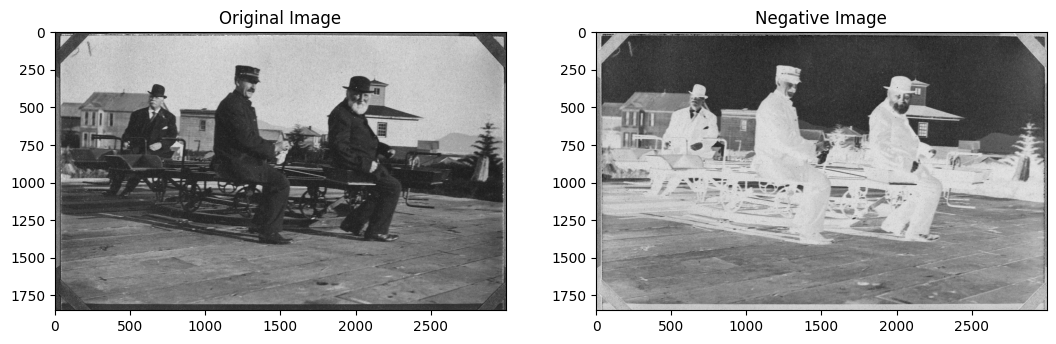

[[0.32483098 0.35259529 0.31409216 ... 0.23464275 0.24407725 0.2416149 ]
 [0.27525725 0.27132078 0.27385843 ... 0.26065725 0.23820627 0.24476353]
 [0.2847898  0.25753137 0.19399059 ... 0.29316863 0.28917176 0.26957882]
 ...
 [0.24388471 0.24945804 0.2562     ... 0.22624902 0.2537     0.24357922]
 [0.23659216 0.24356431 0.24218824 ... 0.27524235 0.26850039 0.21579216]
 [0.24218824 0.2536851  0.2561702  ... 0.2857702  0.27885843 0.2802651 ]]


In [31]:
'''
1
Negative Transformation
'''
def negative(img):
    return (1 - np.copy(img))

img = rgb2gray(io.imread('1.jpg'))
show_images([img, negative(img)],
            ['Original Image', 'Negative Image'])

print(img)

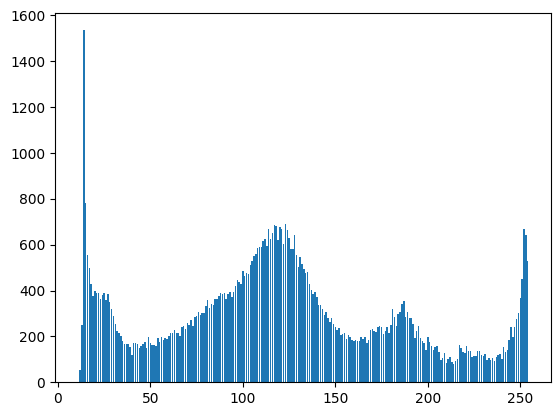

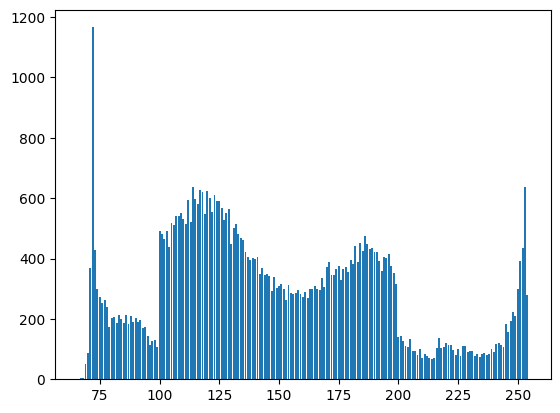

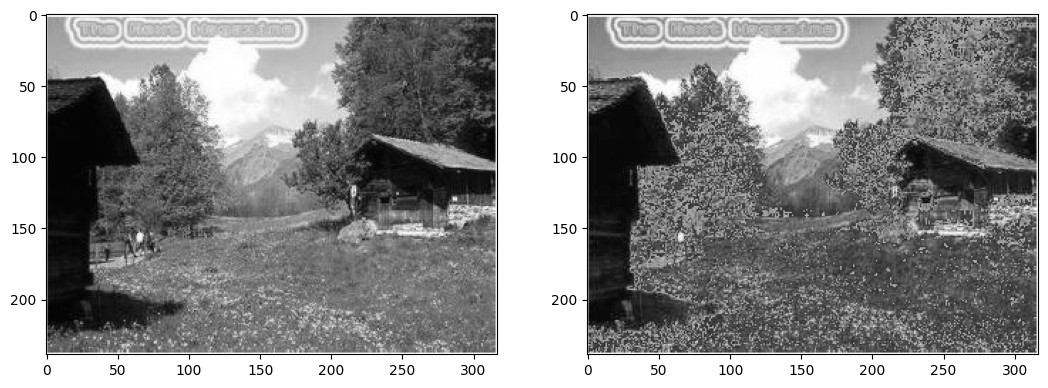

In [32]:
'''
2
Contrast Enhancement
'''
img = np.array(rgb2gray(io.imread('2.jpg')))
showHist(img*255)

# y = (1.5x + 50/255)
def contrast_enhancement(img):
    img_np = np.copy(img)
    img_np[(img_np <= 100/255)] = 1.5*img_np[(img_np <= 100/255)]+50/255
    return img_np

contrast_img = contrast_enhancement(img)
showHist(contrast_img*255)
show_images([img,contrast_img],["",""])

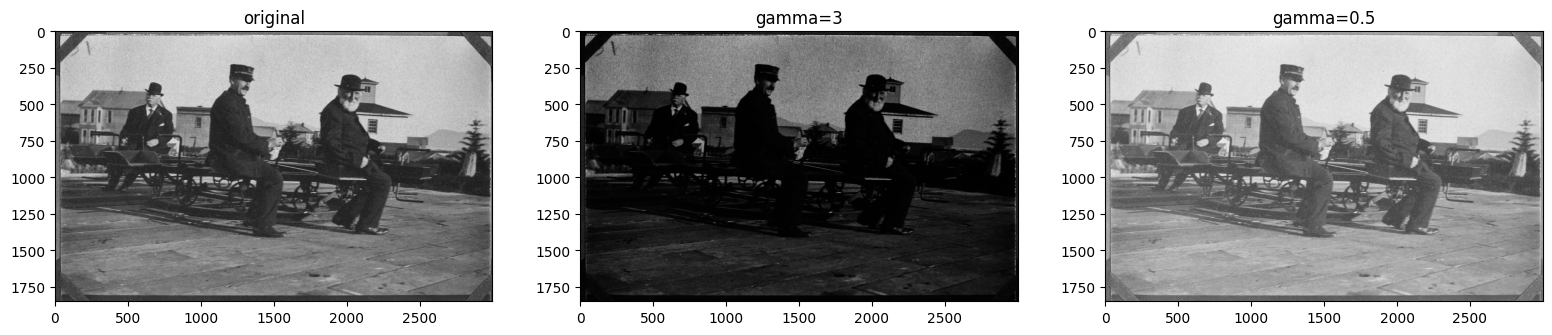

In [33]:
'''
3
Gamma Correction
'''
def gamma_correction(img, gamma):
    return ((np.copy(img)**gamma))

img = rgb2gray(io.imread('1.jpg'))
show_images(
    [img,gamma_correction(img,3),gamma_correction(img,0.5)],
    ["original","gamma=3", "gamma=0.5"]
)


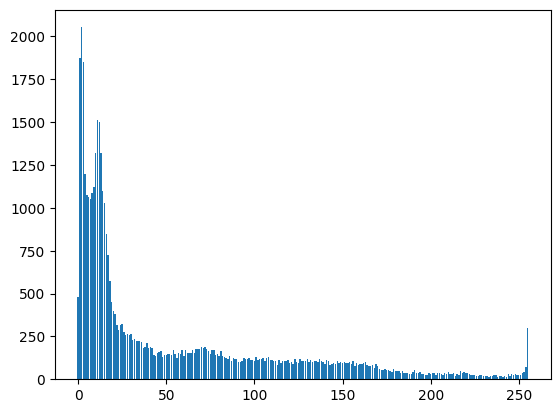

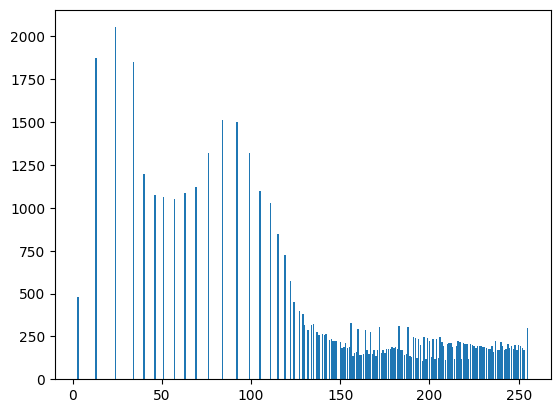

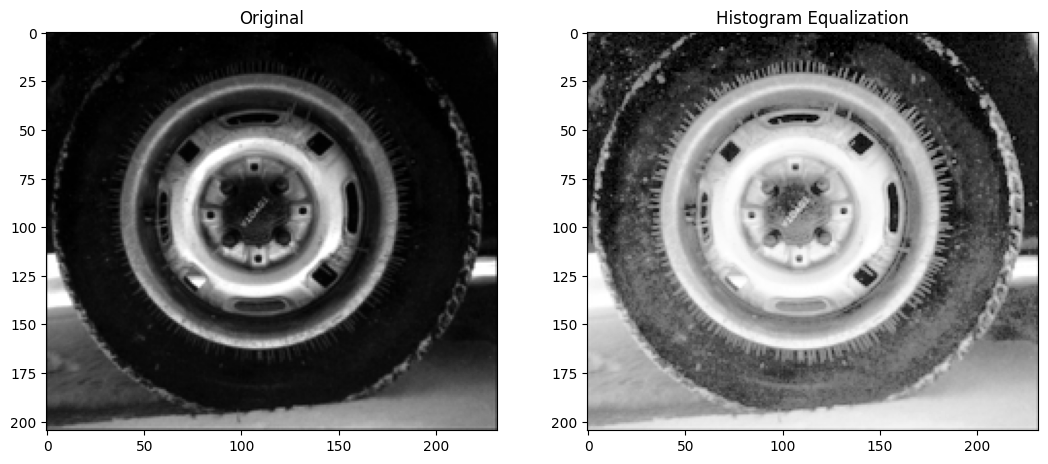

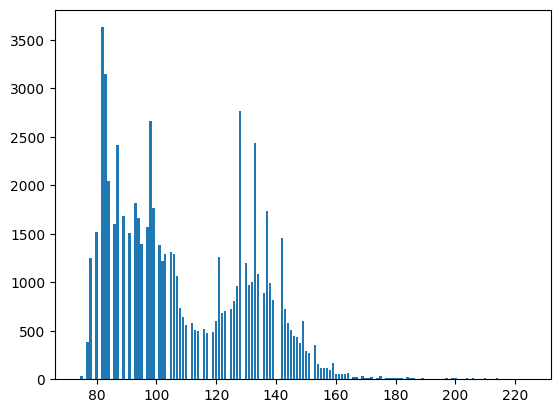

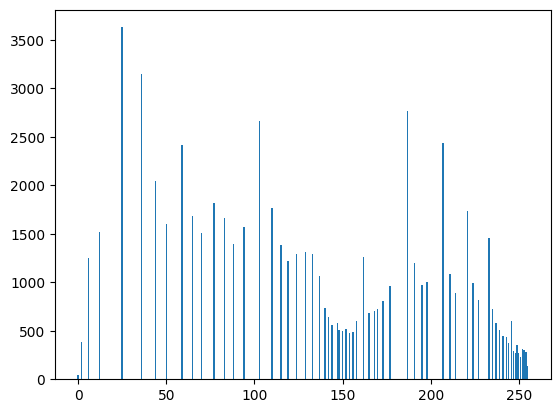

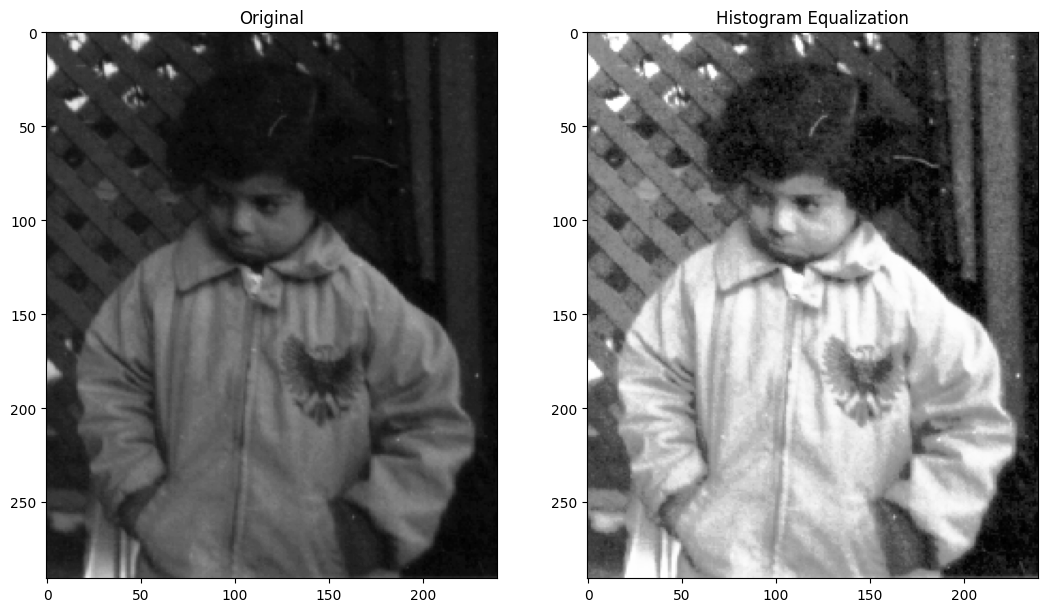

In [34]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
def getImageWithHist(name,ext,nbins=256):
    img = io.imread(name)
    t = img.copy()
    gray = None
    if len(img.shape) >= 3:
        gray = rgb2gray(rgba2rgb(gray))
    else:
        gray = img
    histogram_array = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            histogram_array[int(gray[i,j])] += 1
    for i in range(1,len(histogram_array)):
        histogram_array[i] = histogram_array[i - 1] + histogram_array[i] 
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            gray[i,j] = round(255*histogram_array[gray[i,j]]/(img.shape[0] * img.shape[1]))
    showHist(t)
    showHist(gray)
    show_images([t,gray],["Original","Histogram Equalization"])
            
getImageWithHist("./imgs/tire.tif",None)   
getImageWithHist("./imgs/pout.tif",None)   


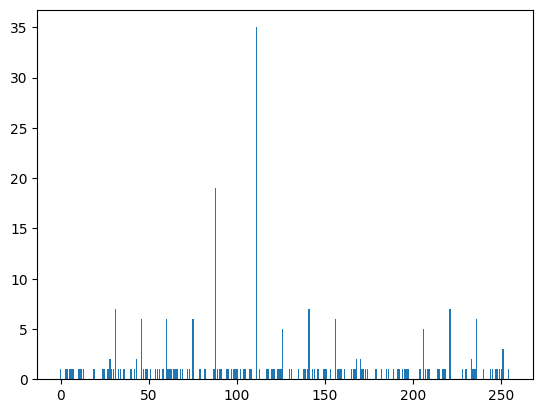

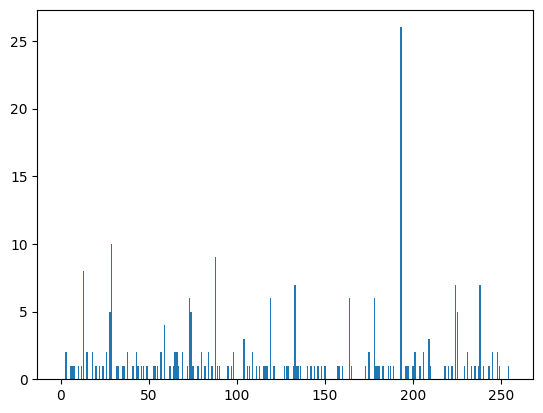

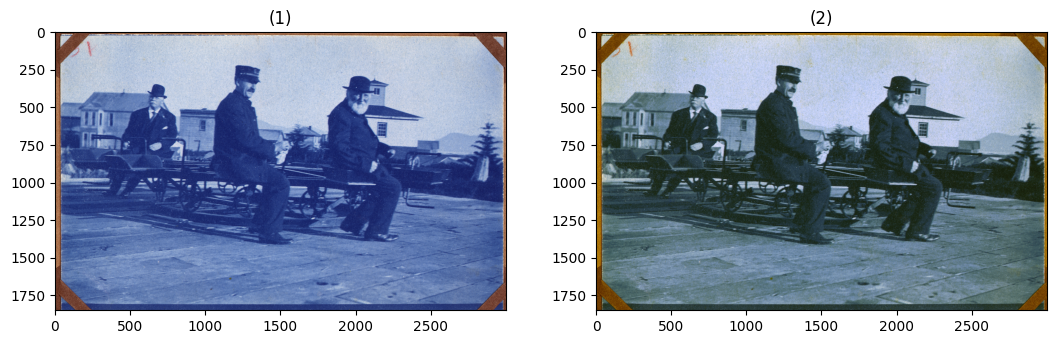

In [35]:
#extra task 

def fixImageWithHist(name,ext,nbins=256):
    img = io.imread(name)
    t = img.copy()
    gray = img.copy()
    histogram_array = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            histogram_array[int(gray[i,j,2])] += 1 #Work on the blue channel only
    for i in range(1,len(histogram_array)):
        histogram_array[i] = histogram_array[i - 1] + histogram_array[i] 
    showHist(histogram_array)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            gray[i,j,2] = round(255*histogram_array[gray[i,j,2]]/(img.shape[0] * img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            histogram_array[int(gray[i,j,2])] += 1
    showHist(histogram_array)
    show_images([t,gray])
    
fixImageWithHist("1.jpg",None)